
##TEAM "RaAD"
#Aditya Kumar
#Rahul Patil



In [5]:
print("Team RaAD -- CultureScout HACKATHON\n Aditya Kumar\n Rahul Patil")

Team RaAD -- CultureScout HACKATHON
 Aditya Kumar
 Rahul Patil


In [6]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
CacheControl                  0.12.11
cached-property               1.5.2
cachetools                    5.3.0
cata

# INSTALLING LIBRARIES

In [7]:
!pip install docx2txt
!pip install PyPDF2
!pip install -q transformers
!pip install multi_rake
!pip install git+https://github.com/LIAAD/yake
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3977 sha256=7bb864c46d2b502da9e4bb252a8a22d62299d1794925a2438bc95f4f94e1b1a5
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4

# IMPORTING LIBRARIES

In [8]:
import re
import sys
import docx2txt
from PyPDF2 import PdfReader
import spacy
from spacy import displacy
from collections import Counter
from tqdm.autonotebook import tqdm
from transformers import pipeline
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline
from multi_rake import Rake
import yake
from keybert import KeyBERT

<ipython-input-8-d97ff10af40c>:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# TASK 1 INFORMATION EXTRACTION
####INCLUDES EXTRACTION OF ENTITIES LIKE EMAIL , PHONE_NO, PERSON NAME, ORGANIZATION

In [9]:
#mount googledrive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [10]:
obtained_txt = docx2txt.process(r'/content/drive/MyDrive/Colab Notebooks/testNlp1.docx')
obtained_txt

'1. Aditya kumar = aditya56678@gmail.com\n\n2. 9144249988\n\n3. ali khan\n\n4. 019-214-2344\n\namanGhosleLahsun@ac.in\n\nData mining, also known as knowledge discovery in data (KDD), is the process of uncovering patterns and other valuable information from large data sets. Given the evolution of data warehousing technology and the growth of big data, adoption of data mining techniques has rapidly accelerated over the last couple of decades, assisting companies by transforming their raw data into useful knowledge. However, despite the fact that that technology continuously evolves to handle data at a large-scale, leaders still face challenges with scalability and automation.Data mining has improved organizational decision-making through insightful data analyses. The data mining techniques that underpin these analyses can be divided into two main purposes; they can either describe the target dataset or they can predict outcomes through the use of machine learning algorithms. These method

In [11]:
#email and phone number format
email = re.compile(r'[a-zA-Z0-9-\.]+@[a-zA-Z-\.]*\.(com|ac.in|edu|net)')
phone_no = re.compile(r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})')



```
Regex, which should also match 7 and 10-digit phone numbers that lack any hyphens, spaces or dots.


(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})

It matched the following values in RegexPal:

000-000-0000 USA 

000 000 0000

000.000.0000

(000)000-0000

(000)000 0000

(000)000.0000

(000) 000-0000

(000) 000 0000

(000) 000.0000

000-0000

000 0000

000.0000

0000000

0000000000 INDIA

(000)0000000
```



In [12]:
#PRINTING ALL EMAILS AND PHONE NUMBERS FOUND IN DOCX FILE

emails = email.finditer(obtained_txt)
phone_nos = phone_no.finditer(obtained_txt)

for gotPhoneNums in phone_nos:
  print(gotPhoneNums.group(0))

for gotEmails in emails:
  print(gotEmails.group(0))

9144249988
019-214-2344
aditya56678@gmail.com


In [23]:
#LETS JUST SAY IF WE ARE WORKING WITH PDF FILE INSTEAD OF DOCX FILE
#TO PRINT EMAIL AND PHONE NUMBER

reader = PdfReader(r'/content/drive/MyDrive/Colab Notebooks/testNlp1.pdf')
num_pages = len(reader.pages)

counter = 0
while counter<num_pages:
  page = reader.pages[counter]
  text = page.extract_text()
  print(text)
  print("\n\n\n\n")
  emails_pdf = email.finditer(text)
  phone_nos_pdf = phone_no.finditer(text)

  print(f"Obtained PhoneNumbers at page {counter+1}\n")
  for gotPhoneNums in phone_nos_pdf:
    print(gotPhoneNums.group(0))

  print(f"\n\nObtained Emails at page {counter+1}\n")
  for gotEmails in emails_pdf:
    print(gotEmails.group(0))
  counter = counter+1
  print("\n\nGoing to next Page")

  print("\n\n")

1. Aditya kumar = aditya56678@gmail.com  
2. 9144249988  
3. ali khan  
4. 019 -214-2344  
amanGhosleLahsun@ac.in  
Data mining, also known as knowledge discovery in data 
(KDD), is the process of uncovering patterns and other 
valuable information from large data sets. Given the 
evolution of data warehousing technology and the growth of 
big data, adoption of data mining techniques has rapidly 
accelerated over the last couple of decades, assisting 
companies by transforming their raw data into useful 
knowledge. However, despite the fact that that technology 
continuously evolves to handle data at a large -scale, leaders 
still face challenges with scalability and automation.Data 
mining has improved organizational decision -making through 
insightful data analyses. The data mining techniques that 
underpin these analyses can be divided into two main 
purposes; they can either descri be the target dataset or they 
can predict outcomes through the use of machine learning 
algorithms.

In [24]:
#FOR IDENTIFICATION OF PERSONS , ORGANIZATION ETC ETC...

!pip install --upgrade spacy
!pip install --upgrade spacy[cuda111,transformers]

!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.4/100.4 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.7/190.7 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.4 MB/s eta 0:00:00
2023-05-07 14:13:14.772787: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
2023-05-07 14:13:50.183641: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi

In [25]:
nlp = spacy.load("en_core_web_lg")
nlp_sm = spacy.load("en_core_web_sm")

nlp(obtained_txt)
doc = nlp(obtained_txt)

In [26]:
#DISPLAY EACH TOKEN ACCORDING TO THEIR CLASSIFIED LABELS LIKE PERSON , ORGANIZATION , CARDINAL , GPE ETC ETC...

displacy.render(doc, style="ent", jupyter=True, manual=False)

In [29]:
#if anyone wants to what label means what??
print(spacy.explain("CARDINAL"),"\n",spacy.explain("GPE"),"\n",spacy.explain("PERSON"),"\n",spacy.explain("DATE"))

Numerals that do not fall under another type 
 Countries, cities, states 
 People, including fictional 
 Absolute or relative dates or periods


In [30]:
just_text = obtained_txt
docs = list(tqdm(nlp.pipe(just_text), total=len(just_text)))

[(i.text, i.ent_iob_ + "-" + i.ent_type_) for i in doc[0:30]]

  0%|          | 0/1440 [00:00<?, ?it/s]

[('1', 'B-CARDINAL'),
 ('.', 'O-'),
 ('Aditya', 'B-PERSON'),
 ('kumar', 'I-PERSON'),
 ('=', 'O-'),
 ('aditya56678@gmail.com', 'O-'),
 ('\n\n', 'O-'),
 ('2', 'B-CARDINAL'),
 ('.', 'O-'),
 ('9144249988', 'B-CARDINAL'),
 ('\n\n', 'O-'),
 ('3', 'B-CARDINAL'),
 ('.', 'O-'),
 ('ali', 'B-PERSON'),
 ('khan', 'I-PERSON'),
 ('\n\n', 'O-'),
 ('4', 'B-CARDINAL'),
 ('.', 'O-'),
 ('019', 'B-CARDINAL'),
 ('-', 'O-'),
 ('214', 'O-'),
 ('-', 'O-'),
 ('2344', 'O-'),
 ('\n\n', 'O-'),
 ('amanGhosleLahsun@ac.in', 'O-'),
 ('\n\n', 'O-'),
 ('Data', 'O-'),
 ('mining', 'O-'),
 (',', 'O-'),
 ('also', 'O-')]

In [31]:
#PERSON IDENTIFICATION

all_persons = []
for d in doc:
    persons = [ent.text for ent in doc if ent.ent_type_ == "PERSON"]
    all_persons.extend(persons)

Counter(all_persons).most_common(15)
if len(all_persons) ==0:
  print("No Persons found in INPUT TEXT")

In [33]:
print(Counter(all_persons).most_common(15))

[('Aditya', 247), ('kumar', 247), ('ali', 247), ('khan', 247)]


In [34]:
#ORGANIZATION / COMPANY IDENTIFICATION

all_orgs = []
for d in doc:
    orgs = [ent.text for ent in doc if ent.ent_type_ == "ORG"]
    all_orgs.extend(orgs)

Counter(all_orgs).most_common(15)

if len(all_orgs) ==0:
  print("No organizations found in INPUT TEXT")

In [35]:
print(Counter(all_orgs).most_common(15))

[('KDD', 247), ('Apache', 247), ('Spark', 247)]


# SENTIMENT CLASSIFICATION

In [36]:
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [39]:
user_txt_input = input("Enter any text\t")

Enter any text	i love cats


In [40]:
#PRINTING MOST LIKELYHOOD ANSWER

data = [user_txt_input]
print(specific_model(data))

[{'label': 'POS', 'score': 0.9911149740219116}]


**'POS' --> POSITIVE**

**'NEG' --> NEGATIVE**

**'NEU' --> NEUTRAL**

In [42]:
# NOW IF WE WANT TO CLASSIFY SCORES FOR ALL EMOTIONAL_LABELS -->POSITIVE ,NEGATIVE, NEUTRAL

data_for_multi_classification = [user_txt_input]
data_txt = data_for_multi_classification[0]

final_result_for_plot =[]
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
 
 
    for t in data_txt.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
#model.save_pretrained(MODEL)

#text = "Good night 😊"
text = preprocess(data_txt)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) positive 0.9773
2) neutral 0.0189
3) negative 0.0038


# VISUALIZATION

In [43]:
for i in range(3):
  print(labels[ranking[i]],scores[ranking[i]])

positive 0.9773393
neutral 0.018877784
negative 0.003782946


In [44]:
plt.style.use('seaborn')

<ipython-input-44-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


['positive', 'neutral', 'negative']
[0.9773393, 0.018877784, 0.003782946]


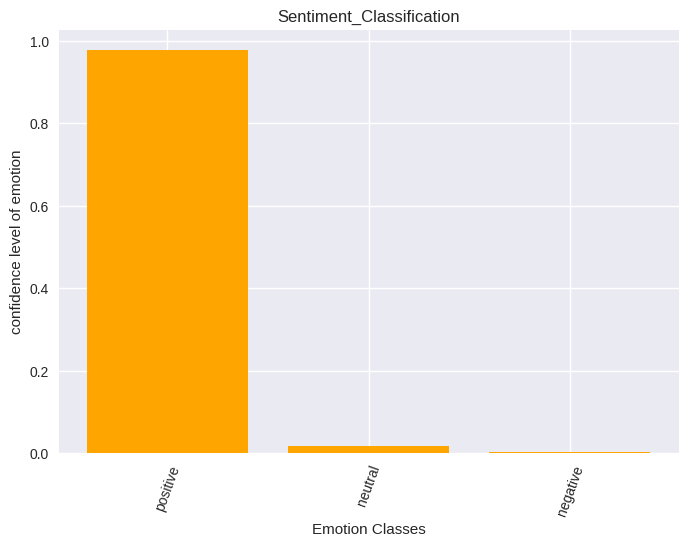

In [45]:
#bar plot
x_label = []
y_scores = []

for i in range(3):
  x_label.append(labels[ranking[i]])
  y_scores.append(scores[ranking[i]])

print(x_label)
print(y_scores)


plt.bar(x_label,y_scores,color='orange')

#adjust xticks
plt.xticks(rotation=70)

#label x-axis
plt.xlabel('Emotion Classes')

#label y-axis
plt.ylabel('confidence level of emotion')

#label the plot
plt.title('Sentiment_Classification')

#save plot
#plt.savefig('matplotlib_plotting_7.png',dpi=300,bbox_inches='tight')

#display plot
plt.show()

# DEEPLEARING FRAME Q/A BASED ON DOC FILE

In [49]:
!python -m spacy download en_core_web_trf

2023-05-07 14:37:28.257786: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.3/460.3 MB 2.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [53]:
!pip install spacy-transformers
import spacy_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
nlp_trf = spacy.load("en_core_web_trf")

doc = nlp_trf(obtained_txt)
displacy.render(doc, style="ent", jupyter=True)

In [55]:
#DISPLAY GRAMMATICAL RELATIONS BETWEEN DIFFERENT TOKEN INSIDE CORPUS

doc = nlp(obtained_txt)
sent = list(doc.sents)[1]
displacy.render(sent, style="dep", jupyter=True)

In [56]:
display(sent.text)

'Aditya kumar = aditya56678@gmail.com\n\n2. 9144249988\n\n3. ali khan\n\n4. 019-214-2344\n\namanGhosleLahsun@ac.in\n\nData mining, also known as knowledge discovery in data (KDD), is the process of uncovering patterns and other valuable information from large data sets.'

In [57]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "deepset/roberta-base-squad2"

hugg = pipeline('question-answering', model=model_name, tokenizer=model_name)

In [58]:
#if User want to question
user_question = input("Enter your query\t")

Enter your query	what is data mining


In [62]:
#DISPLAYING ANSWERS WITH REFERENCE TO THE CORPUS PRESENT IN FILE


QA_input = {
    'question': user_question,
    'context': sent.text
}
res = hugg(QA_input)

print(res) #result with labels -->Raw answering


print("\n\n")
final_ans= res['answer']
print("ANSWER IS: ",final_ans) #Printing focused answer

{'score': 0.26368680596351624, 'start': 172, 'end': 258, 'answer': 'the process of uncovering patterns and other valuable information from large data sets'}



ANSWER IS:  the process of uncovering patterns and other valuable information from large data sets


# CONTEXT AND KEYWORD IDENTIFICATION

In [67]:
obtained_txt2 = "Data mining, also known as knowledge discovery in data (KDD), is the process of uncovering patterns and other valuable information from large data sets. Given the evolution of data warehousing technology and the growth of big data, adoption of data mining techniques has rapidly accelerated over the last couple of decades, assisting companies by transforming their raw data into useful knowledge. However, despite the fact that that technology continuously evolves to handle data at a large-scale, leaders still face challenges with scalability and automation.Data mining has improved organizational decision-making through insightful data analyses. The data mining techniques that underpin these analyses can be divided into two main purposes; they can either describe the target dataset or they can predict outcomes through the use of machine learning algorithms. These methods are used to organize and filter data, surfacing the most interesting information, from fraud detection to user behaviors, bottlenecks, and even security breaches.When combined with data analytics and visualization tools, like Apache Spark, delving into the world of data mining has never been easier and extracting relevant insights has never been faster. Advances within artificial intelligence only continue to expedite adoption across industries."

In [68]:
from multi_rake import Rake
rake = Rake()
keywords = rake.apply(obtained_txt2)

#all keywords related to this context on one list
print(keywords[:10])

[('technology continuously evolves', 9.0), ('improved organizational decision-making', 9.0), ('machine learning algorithms', 9.0), ('extracting relevant insights', 9.0), ('large data sets', 8.285714285714285), ('data warehousing technology', 8.285714285714285), ('data mining techniques', 7.685714285714285), ('insightful data analyses', 7.285714285714286), ('data mining', 4.685714285714285), ('big data', 4.285714285714286)]


In [69]:
#most relevent context to this corpus would be
for i in range(10):
  print(keywords[i])
  print("\n")

('technology continuously evolves', 9.0)


('improved organizational decision-making', 9.0)


('machine learning algorithms', 9.0)


('extracting relevant insights', 9.0)


('large data sets', 8.285714285714285)


('data warehousing technology', 8.285714285714285)


('data mining techniques', 7.685714285714285)


('insightful data analyses', 7.285714285714286)


('data mining', 4.685714285714285)


('big data', 4.285714285714286)




In [70]:
# ANOTHER METHOD USING RAKE FOR CONTEXT AND KEYWORD IDENTIFICATION

kw_extractor = yake.KeywordExtractor(top=10, stopwords=None)
keywords = kw_extractor.extract_keywords(obtained_txt2)
for kw, v in keywords:
  print("Keyphrase: ",kw, ": score", v)

Keyphrase:  large data sets : score 0.012354533729270522
Keyphrase:  data mining techniques : score 0.021983002296349266
Keyphrase:  Data mining : score 0.022626926758312377
Keyphrase:  Data : score 0.026616928780721354
Keyphrase:  process of uncovering : score 0.0359885614189422
Keyphrase:  uncovering patterns : score 0.0359885614189422
Keyphrase:  mining : score 0.04797174582746027
Keyphrase:  knowledge discovery : score 0.05105873592824253
Keyphrase:  mining techniques : score 0.05267880670273334
Keyphrase:  KDD : score 0.05732400781576302


In [71]:
#ANOTHER METHOD USING KEYBERT

kw_model = KeyBERT(model='all-mpnet-base-v2')

In [72]:
keywords = kw_model.extract_keywords(obtained_txt2, 

                                     keyphrase_ngram_range=(1, 2), 

                                     stop_words='english', 

                                     highlight=False,

                                     top_n=10)

keywords_list= list(dict(keywords).keys())

print(keywords_list)

['data mining', 'data analytics', 'big data', 'knowledge discovery', 'data warehousing', 'insightful data', 'analytics', 'uncovering patterns', 'machine learning', 'data adoption']


In [73]:
key_list = list(dict(keywords).keys())
value_list= list(dict(keywords).values())

for i in range(len(key_list)):
  print(f"Found keyword \t{key_list[i]}\t with confidence value of \t{value_list[i]}")

Found keyword 	data mining	 with confidence value of 	0.6293
Found keyword 	data analytics	 with confidence value of 	0.5871
Found keyword 	big data	 with confidence value of 	0.5553
Found keyword 	knowledge discovery	 with confidence value of 	0.5498
Found keyword 	data warehousing	 with confidence value of 	0.5021
Found keyword 	insightful data	 with confidence value of 	0.4971
Found keyword 	analytics	 with confidence value of 	0.4833
Found keyword 	uncovering patterns	 with confidence value of 	0.483
Found keyword 	machine learning	 with confidence value of 	0.4786
Found keyword 	data adoption	 with confidence value of 	0.4667
